In [1]:
import pandas as pd

# Import file .tsv
df = pd.read_csv('breast_msk_2025_clinical_data.tsv', sep='\t')

# Eksplorasi Data

In [2]:
df.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Ethnicity,Fraction Genome Altered,Sex,Gene Panel,Metastatic Site,...,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race,Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Somatic Status,Tumor Purity
0,breast_msk_2025,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,Non-Spanish; Non-Hispanic,0.2782,FEMALE,IMPACT341,NaN,...,3.550646,1:DECEASED,Breast,WHITE,Tumor,1,428,Primary,Matched,50
1,breast_msk_2025,P-0000012,P-0000012-T02-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,Non-Spanish; Non-Hispanic,0.3146,Female,IMPACT341,NaN,...,132.656081,0:LIVING,Breast,White,Tumor,1,344,Primary,Matched,NaN
2,breast_msk_2025,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,Non-Spanish; Non-Hispanic,0.3503,FEMALE,IMPACT341,Liver,...,13.676562,1:DECEASED,Breast,WHITE,Tumor,1,281,Metastasis,Matched,40
3,breast_msk_2025,P-0000041,P-0000041-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,Non-Spanish; Non-Hispanic,0.4041,FEMALE,IMPACT341,NaN,...,13.314923,1:DECEASED,Breast,WHITE,Tumor,1,401,Primary,Matched,30
4,breast_msk_2025,P-0000057,P-0000057-T01-IM3,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Non-Spanish; Non-Hispanic,0.4286,FEMALE,IMPACT341,NaN,...,29.161324,1:DECEASED,Breast,WHITE,Tumor,1,835,Primary,Matched,25


In [11]:
print(df['Sex'].unique())

['FEMALE' 'Female' 'Male' 'MALE']


In [6]:
# Persiapkan data untuk Kaplan-Meier
df['time'] = df['Overall Survival (Months)']
df['event'] = df['Overall Survival Status'].apply(lambda x: 1 if isinstance(x, str) and '1:DECEASED' in x else 0)
df = df.dropna(subset=['time'])

# Analisis Kaplan-Meier

<Axes: xlabel='timeline'>

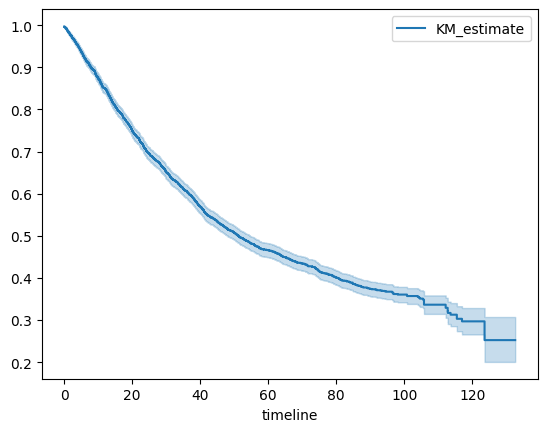

In [7]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(df['time'], df['event'])
kmf.plot()

# Statistik Tambahan

In [8]:
# Median Survival Time
print(f"Median Survival Time: {kmf.median_survival_time_} months")
print(f"95% Confidence Interval: {kmf.confidence_interval_survival_function_}")

Median Survival Time: 51.31998553 months
95% Confidence Interval:             KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.000000                  0.994548                0.998238
0.065753                  0.993876                0.997848
0.098629                  0.993213                0.997447
0.131505                  0.992558                0.997040
0.164382                  0.992233                0.996833
...                            ...                     ...
129.302693                0.200560                0.307221
129.434198                0.200560                0.307221
130.223230                0.200560                0.307221
130.288983                0.200560                0.307221
132.656081                0.200560                0.307221

[1930 rows x 2 columns]


# Analisis Berdasarkan Jenis Kelamin

Log-rank test p-value: 0.09394748919835799
Test statistic: 2.8053986565234728


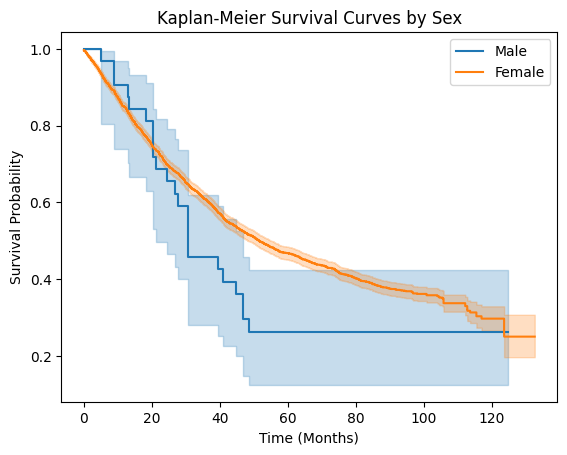

In [12]:
from lifelines.statistics import logrank_test

# Pisahkan data berdasarkan jenis kelamin
male = df[df['Sex'].str.upper() == 'MALE']
female = df[df['Sex'].str.upper() == 'FEMALE']

# Fit KM untuk masing-masing
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

kmf_male.fit(male['time'], male['event'], label='Male')
kmf_female.fit(female['time'], female['event'], label='Female')

# Plot
ax = kmf_male.plot()
kmf_female.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curves by Sex')
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Survival Probability')

# Log-rank test
results = logrank_test(male['time'], female['time'], male['event'], female['event'])
print(f"Log-rank test p-value: {results.p_value}")
print(f"Test statistic: {results.test_statistic}")

# Kesimpulan
Analisis survival untuk data kanker payudara menunjukkan median survival time sekitar 51 bulan. Tidak ada perbedaan signifikan dalam survival berdasarkan jenis kelamin (p-value = 0.094).